## 결정트리 유방암 진단 ##

In [1]:
!pip install sklearn
!pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import graphviz
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
cancer.data.shape # rows columns 수 확인

(569, 30)

In [5]:
cancer.feature_names  # columns name

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer.target_names  # 악성 양성

array(['malignant', 'benign'], dtype='<U9')

In [7]:
np.bincount(cancer.target) # cancer.target[cancer.target==0].shape

array([212, 357], dtype=int64)

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
for i,name in enumerate(cancer.feature_names):
    print('%02d : %s' %(i,name)) 
    # 0을 안붙이면 앞에 0을 안붙이고, 02를 안붙이면 숫자를 앞으로 땡겨쓴다.

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [10]:
cancer.target_names # malignant(악성), benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [11]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [12]:
_, bins=np.histogram(cancer.data[:,0], bins=20)
np.histogram(cancer.data[:,0], bins=20)

(array([ 4, 15, 31, 48, 93, 92, 71, 58, 32, 23, 22, 28, 27, 11,  2,  5,  2,
         2,  0,  3], dtype=int64),
 array([ 6.981  ,  8.03745,  9.0939 , 10.15035, 11.2068 , 12.26325,
        13.3197 , 14.37615, 15.4326 , 16.48905, 17.5455 , 18.60195,
        19.6584 , 20.71485, 21.7713 , 22.82775, 23.8842 , 24.94065,
        25.9971 , 27.05355, 28.11   ]))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    model = DecisionTreeClassifier()  # 결정트리화
    model.fit(X_train,y_train)
    
    
    score = model.score(X_test,y_test)
    scores.append(score)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    display(train_score, test_score)
print('scores =', scores)

1.0

0.958041958041958

1.0

0.9230769230769231

1.0

0.9230769230769231

1.0

0.951048951048951

1.0

0.9440559440559441

1.0

0.951048951048951

1.0

0.916083916083916

1.0

0.9370629370629371

1.0

0.9300699300699301

1.0

0.9230769230769231

scores = [0.958041958041958, 0.9230769230769231, 0.9230769230769231, 0.951048951048951, 0.9440559440559441, 0.951048951048951, 0.916083916083916, 0.9370629370629371, 0.9300699300699301, 0.9230769230769231]


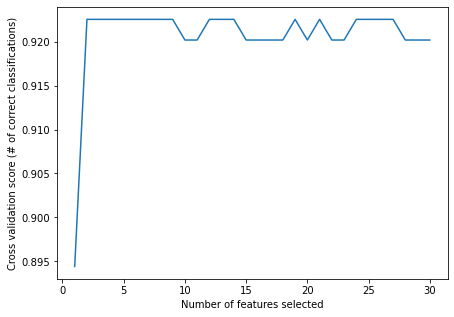

In [14]:
from sklearn.feature_selection import RFECV
min_features_to_select = 1
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=12, random_state=12)

rfe = RFECV(estimator=clf,   # 차원 축소 
    step=1,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    min_features_to_select=min_features_to_select
    )
rfe = rfe.fit(X_train, y_train)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(7,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(min_features_to_select, len(rfe.grid_scores_)+min_features_to_select),rfe.grid_scores_)
plt.show()

In [15]:
best_features = cancer.feature_names[rfe.support_]

drop_features = [ column_name for column_name in cancer.feature_names[2:] if column_name not in best_features ]

print('Optimal number of features :', rfe.n_features_)
print('Best features :', best_features)
print('Drop features :', drop_features)

Optimal number of features : 2
Best features : ['worst area' 'worst concave points']
Drop features : ['mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst symmetry', 'worst fractal dimension']


## 모델 빌드업

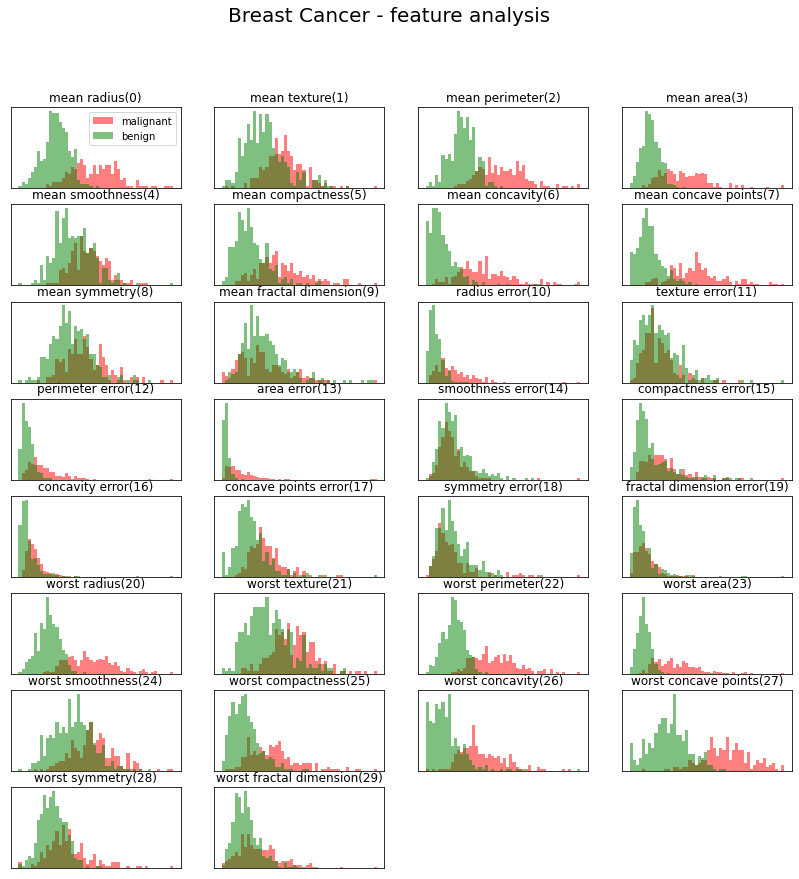

In [16]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

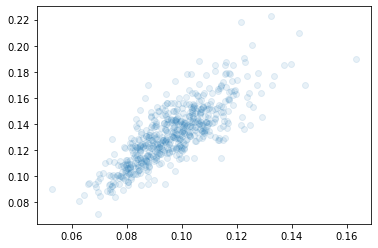

In [17]:
plt.scatter(cancer.data[:,4], cancer.data[:,24], alpha=0.1)

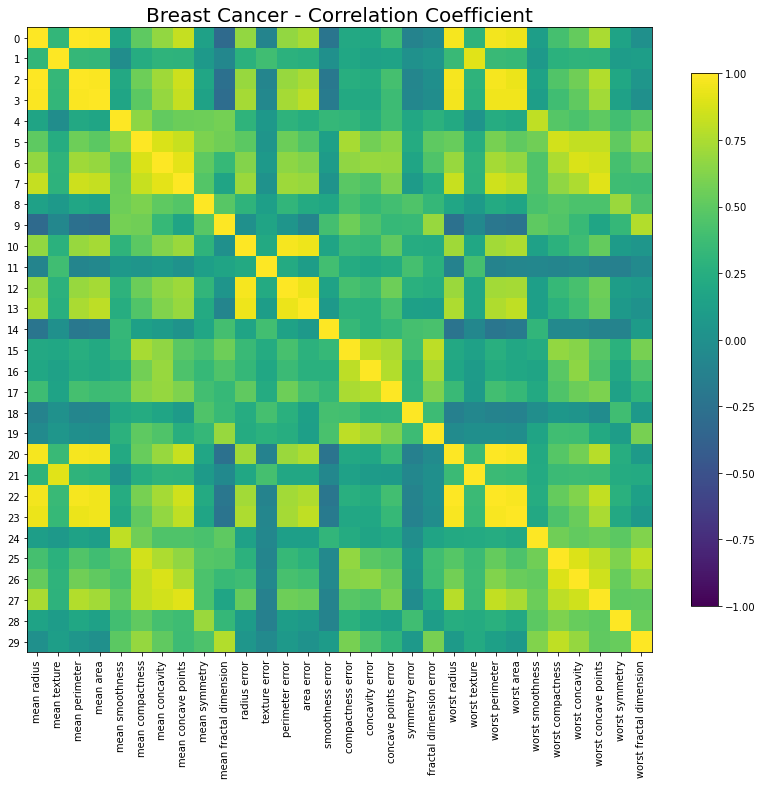

In [18]:
#모든 속성에 대해서 한번에 그래프를 
#그릴수 없으므로 상관관계를 수치를 통해 데이터를 파악한다.
mat=np.corrcoef(cancer.data.T)  # 열로 읽으므로 Transpose 시켜줘야 한다.
mat.shape, mat[4,24]
# 속성간의 관계를 한 눈에 파악
fig=plt.figure(figsize=[14,14])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),cancer.feature_names,rotation=90,ha='center')
plt.yticks(range(30))
print('')

## 결정트리의 옵션들

In [19]:
model

# gini 알고리즘을 사용하여 경계선 선택, 속도는 느리지만 엔트로피 알고리즘이 더 정확
# max_depth 몇층까지 내려갈거냐. 한번 분기가 1층

DecisionTreeClassifier()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

score_train = []
score_test = []

for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    score1 = model.score(X_train,y_train)
    score2 = model.score(X_test, y_test)
    score_train.append(score1)
    score_test.append(score2)
    

Text(0.5, 0, 'max_depth')

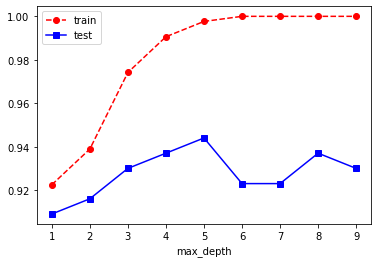

In [21]:
plt.plot(range(1,10), score_train, 'ro--')
plt.plot(range(1,10), score_test, 'bs-')
plt.legend(['train','test'])
plt.xlabel('max_depth')

## 그래프 출력을 위한 graphviz

In [22]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(cancer.data, cancer.target)
from IPython.display import display
import graphviz
from sklearn.tree import export_graphviz



export_graphviz(model,out_file='tree2.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)


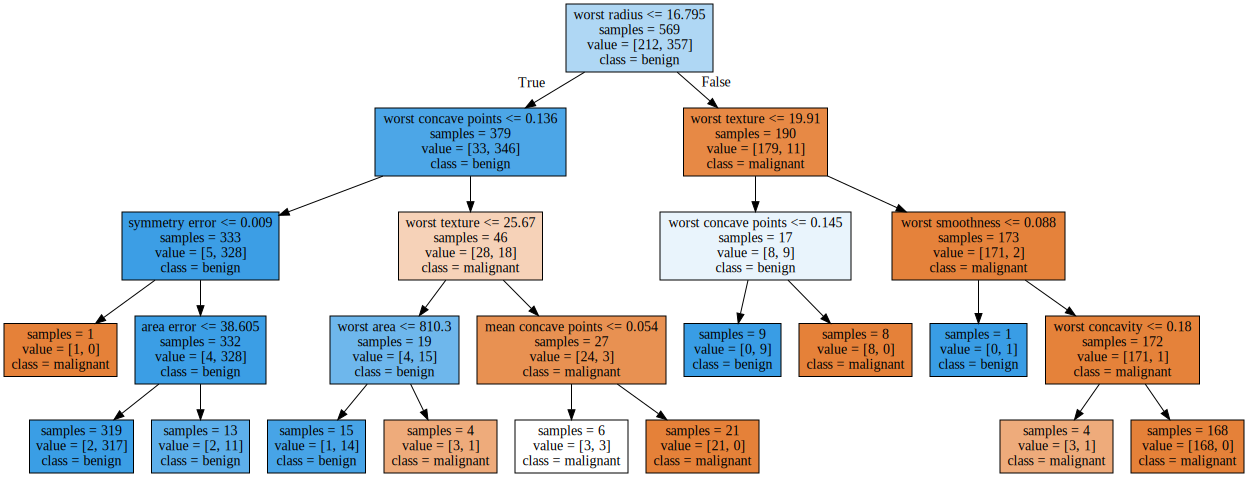

In [23]:
with open('tree2.dot') as f: #tree2.dot으로 저장
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [24]:
# save dot to png
import graphviz
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree2') #tree2.png 저장

'tree2.png'

In [25]:
model

DecisionTreeClassifier(max_depth=4)

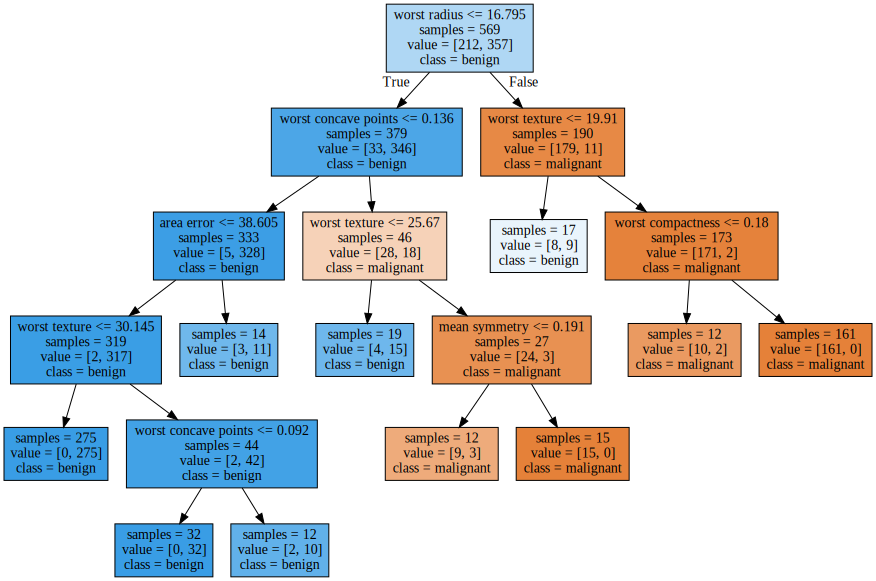

In [26]:
model = DecisionTreeClassifier(min_samples_leaf=12)
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

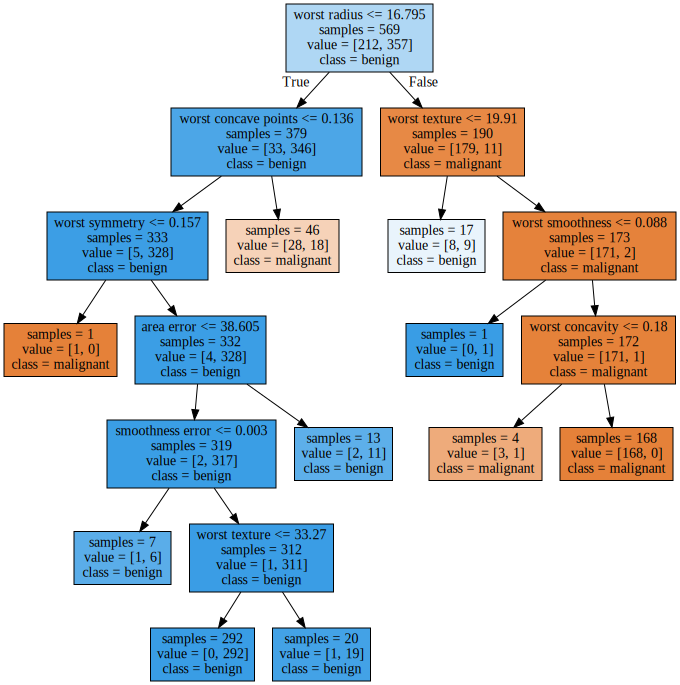

In [27]:
model = DecisionTreeClassifier(min_samples_split=50)  # 최소샘플 수를 50으로 잡았을 경우
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

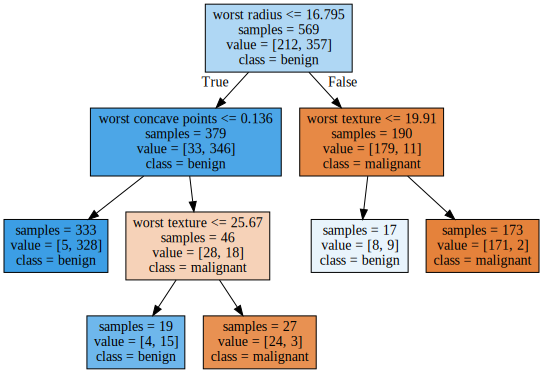

In [28]:
model = DecisionTreeClassifier(max_leaf_nodes=5)  # 최대 리프노드를 5로 잡았을 경우
model.fit(cancer.data, cancer.target)

from sklearn.tree import export_graphviz

export_graphviz(model,out_file='tree1.dot',class_names=cancer.target_names,
                feature_names=cancer.feature_names,impurity=False,filled=True)

import graphviz

with open('tree1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))